# Group Project Neural Network

## Loading Data

For this project, since the data that needs to be processed is stored as a `.csv` file, the data can be loaded with `pandas`. Using `pandas` allows for the data to maintain the format of a table with columns and tuples.

In [2]:
import pandas as pd
data = pd.read_csv('project_data.csv')

The labled columns represent each atribute being considered in the classification and the tupels contain the data of a specific client that is being assesed. The `pandas` table of data can be seen below:

In [3]:
data

,age,surgery,docvisit,allergy,med,disease,bmi,class
0,20,0,2,no,no,cholesterol,28,low
1,21,0,4,no,no,no,23,low
2,22,0,3,no,no,no,23,low
3,23,0,3,no,no,no,23,low
4,24,0,3,no,no,no,21,low
...,...,...,...,...,...,...,...,...
112,88,0,2,yes,yes,no,21,low
113,88,0,2,no,no,no,22,low
114,88,2,18,yes,yes,no,28,high
115,88,1,5,no,yes,diabetes,33,high


## Preprocessing

In order to be able to train a neural network with this data some preprocessing needs to be done. The data contains strings that need to be replaced with an 'equivalent' integers.

In [ ]:
data = data.replace({'allergy': {'no': 0, 'yes': 1}})
data = data.replace({'med': {'no': 0, 'yes':1}})
data = data.replace({'disease': {'no': 0, 'cholesterol':1, 'heart':2, 'diabetes':3}})
data = data.replace({'class': {'low': 0, 'medium':1, 'high':2}})
data

As can be seen below, `data` is now homogenous with dtype `int`.

In [5]:
data.dtypes

age         int64
surgery     int64
docvisit    int64
allergy     int64
med         int64
disease     int64
bmi         int64
class       int64
dtype: object

The validity of the data can be tested using `seaborn.pairplot`.

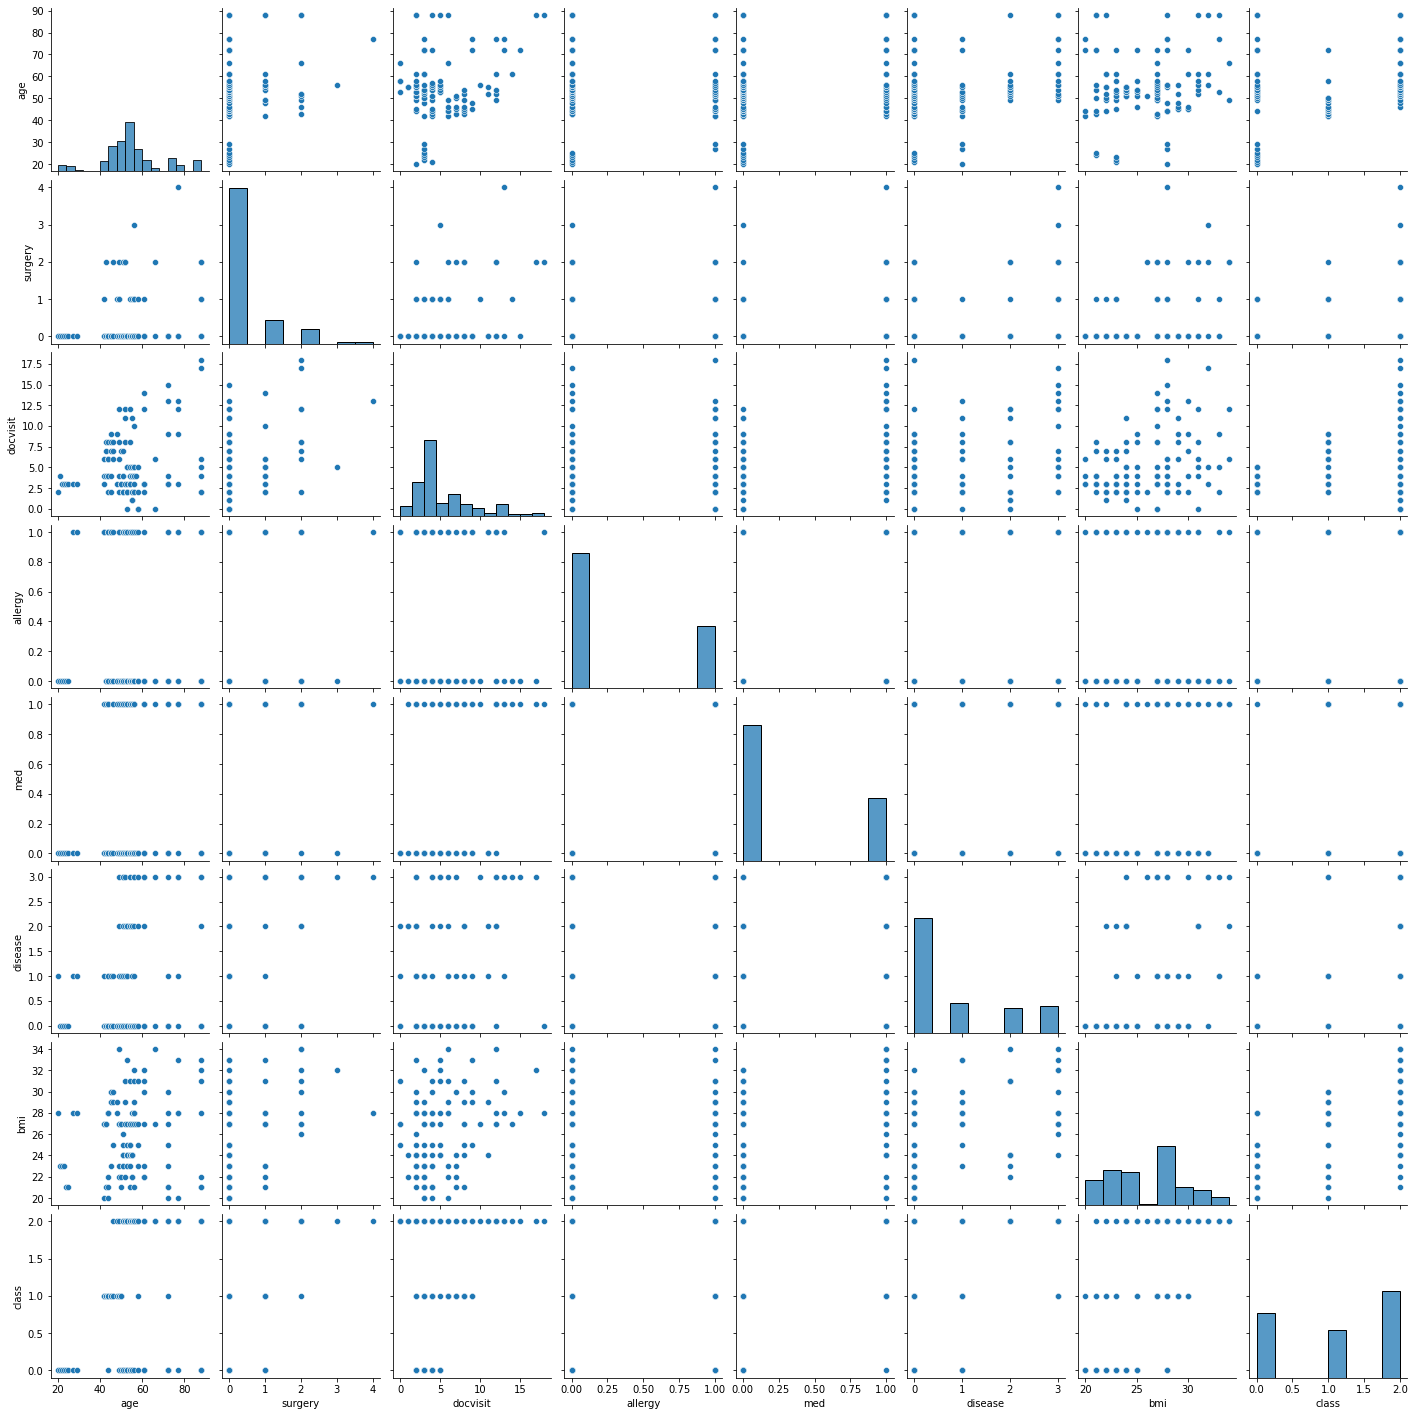

In [6]:
import seaborn as sns
sns.pairplot(data)

The `data` table needs to be split so that the class category is contained within its own `target` table.

In [7]:
target = data.pop('class')

The result is the `data` table no longer contains the class category and a new `target` table is created.

In [8]:
data

,age,surgery,docvisit,allergy,med,disease,bmi
0,20,0,2,0,0,1,28
1,21,0,4,0,0,0,23
2,22,0,3,0,0,0,23
3,23,0,3,0,0,0,23
4,24,0,3,0,0,0,21
...,...,...,...,...,...,...,...
112,88,0,2,1,1,0,21
113,88,0,2,0,0,0,22
114,88,2,18,1,1,0,28
115,88,1,5,0,1,3,33


In [9]:
target

0      0
1      0
2      0
3      0
4      0
      ..
112    0
113    0
114    2
115    2
116    2
Name: class, Length: 117, dtype: int64

## Neural Network Training

The neural network can now be trained. The neural network must have an output layer with three nodes, where each one represents one of the possible classifications; 'low', 'medium', or 'high'. 

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Dropout

model = Sequential()
model.add(Flatten())
model.add(Dense(100, input_dim=7, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(data, target, validation_split=0.2, epochs=50, batch_size=16, verbose = 2)

Epoch 1/50
6/6 - 1s - loss: 3.5296 - accuracy: 0.3871 - val_loss: 2.9409 - val_accuracy: 0.6250
Epoch 2/50
6/6 - 0s - loss: 1.5415 - accuracy: 0.2688 - val_loss: 2.5798 - val_accuracy: 0.0000e+00
Epoch 3/50
6/6 - 0s - loss: 1.6138 - accuracy: 0.3333 - val_loss: 2.0657 - val_accuracy: 0.2083
Epoch 4/50
6/6 - 0s - loss: 1.3482 - accuracy: 0.3871 - val_loss: 2.0839 - val_accuracy: 0.5417
Epoch 5/50
6/6 - 0s - loss: 1.2565 - accuracy: 0.4731 - val_loss: 1.8548 - val_accuracy: 0.5000
Epoch 6/50
6/6 - 0s - loss: 1.1728 - accuracy: 0.4086 - val_loss: 1.6364 - val_accuracy: 0.3750
Epoch 7/50
6/6 - 0s - loss: 1.1097 - accuracy: 0.3978 - val_loss: 1.5297 - val_accuracy: 0.4583
Epoch 8/50
6/6 - 0s - loss: 1.0584 - accuracy: 0.4839 - val_loss: 1.5011 - val_accuracy: 0.5833
Epoch 9/50
6/6 - 0s - loss: 1.0308 - accuracy: 0.4839 - val_loss: 1.3304 - val_accuracy: 0.4583
Epoch 10/50
6/6 - 0s - loss: 0.9891 - accuracy: 0.5054 - val_loss: 1.2419 - val_accuracy: 0.5417
Epoch 11/50
6/6 - 0s - loss: 0.9679

## Evaluation of Training

The newly trained neural network can be evaluated for accuracy and loss using `model.evaluate`.

In [11]:
model.evaluate(data,target, batch_size=16, verbose = 3)

[0.5214096903800964, 0.8461538553237915]

The neural network can also now be used to predict the classification of any appropriate sets of input data.

In [12]:
import numpy as np
predict = model.predict(data)
classes = np.argmax(predict,axis=1)

classes = np.where(classes == 0,'low', classes)
classes = np.where(classes == '1','medium', classes)
classes = np.where(classes == '2','high', classes)

print(classes)

['low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'medium' 'medium'
 'medium' 'medium' 'medium' 'high' 'medium' 'low' 'medium' 'medium'
 'medium' 'medium' 'high' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'high' 'medium' 'medium' 'medium' 'high' 'medium' 'low' 'high'
 'high' 'high' 'high' 'low' 'high' 'low' 'high' 'high' 'high' 'low' 'high'
 'high' 'high' 'low' 'high' 'medium' 'low' 'high' 'low' 'high' 'high'
 'low' 'high' 'high' 'high' 'low' 'low' 'low' 'low' 'medium' 'low' 'high'
 'high' 'high' 'low' 'high' 'high' 'low' 'low' 'high' 'high' 'low' 'high'
 'high' 'low' 'high' 'high' 'high' 'high' 'high' 'low' 'high' 'low' 'high'
 'low' 'high' 'low' 'low' 'high' 'high' 'high' 'low' 'high' 'low' 'low'
 'low' 'low' 'low' 'high' 'low' 'high' 'low' 'high' 'high' 'high' 'high'
 'low' 'low' 'low' 'high' 'high' 'high']


Graphs can be plotted in order to make the accuracy and loss easier to visualise. The first graph shows 'Acuraccy' against 'Time' for the the neural network model. The second graph shows 'Loss' against 'Time' for the neural network model. Both graphs compare the 'Training' results with the 'Test' resluts.

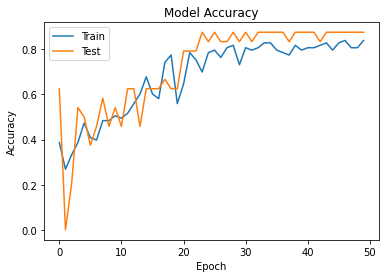

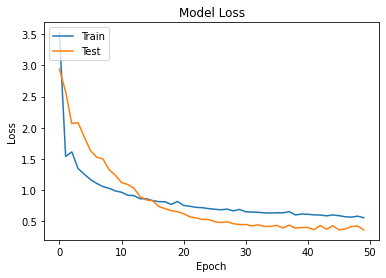

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()